In [2]:
import numpy as np 
import pandas as pd
import nltk 
import tensorflow
from tensorflow.keras.utils import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from tensorflow.keras.layers import Embedding, LSTM, Dense,SimpleRNN,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import string
from textblob import TextBlob
import joblib 

In [3]:
len(open("data/train.txt","r").readlines())

16000

In [4]:
len(open("data/test.txt","r").readlines())

2000

In [7]:
##priniting first line of the dataset 
open("data/val.txt","r").readlines()[0]

'im feeling quite sad and sorry for myself but ill snap out of it soon;sadness\n'

In [8]:
##reading the data from the text file 
train = open("data/train.txt","r").readlines()
test = open("data/test.txt","r").readlines()
val = open("data/val.txt","r").readlines()

In [9]:
full_data = train + test + val
len(full_data)

20000

In [10]:
##creating independent and dependent variables
x = []
y = []
for item in full_data:
    text,label  = item.split(";")
    label = label.replace("\n","")
    x.append(text)
    y.append(label)

In [11]:
##text cleaning steps 
# 1 - doing lowercase 
#2 = perform tokenization 
#3 = remove stop words
#4 - perform stemming or lemma
#then we will get clean data 

def text_cleaning(sentences):
    clean_text = []
    for sent in sentences:
        sent = sent.lower()
        sent = nltk.word_tokenize(sent)
        sent = [word for word in sent if word not in stopwords.words("english")]
        ps = PorterStemmer()
        sent = [ps.stem(word) for word in sent]
        clean_text.append(" ".join(sent))
    return clean_text


In [12]:
cleaned_data = text_cleaning(x)

In [13]:
# comparison 
x[0]

'i didnt feel humiliated'

In [14]:
cleaned_data[0]

'didnt feel humili'

In [16]:
##tokenization 
tokenizer = Tokenizer(
    oov_token = "<nothing>",
)
tokenizer.fit_on_texts(cleaned_data)

In [18]:
tokenizer.word_index
joblib.dump(tokenizer.word_index,"tokenizer.lb")

['tokenizer.lb']

In [ ]:
##to check the no of counts of words in tokenizer
tokenizer.word_counts

In [20]:
##to check the total no of sent
tokenizer.document_count

20000

In [21]:
##tokenzise the input sent as the seq 
sequences = tokenizer.texts_to_sequences(cleaned_data)
sequences[0:5]

[[61, 2, 522],
 [10, 2, 419, 682, 67, 50, 60, 96, 1229],
 [4, 1230, 431, 107, 2, 432, 192],
 [92, 2, 592, 3696, 7, 21, 2844],
 [2, 918]]

In [22]:
##to equalise the lenght of the input 
sequences = pad_sequences(sequences,maxlen = 35,padding = "post")
sequences[0:3]

array([[  61,    2,  522,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  10,    2,  419,  682,   67,   50,   60,   96, 1229,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   4, 1230,  431,  107,    2,  432,  192,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]])

In [23]:
##to check the unique lables and no of class 
unique_label = list(pd.Series(np.array(y)).unique())
no_of_class = len(unique_label)

unique_label , no_of_class

(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'], 6)

In [24]:
##label encoding 
label_dict  = {
    'sadness':0, 'anger':1, 'love':2, 'surprise':3, 'fear':4, 'joy':5
}

def label_encoder(labels):
    label = []
    for lab in labels:
        label.append(label_dict[lab])
    label = np.array(label)
    return label

In [25]:
label =label_encoder(y)
label[0:5]

array([0, 0, 1, 2, 1])

In [26]:
##splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(sequences,label,
                                                 test_size = 0.2,
                                                 random_state = 42)

In [28]:
##model defining : 
model = Sequential()
model.add(SimpleRNN(32,input_shape = (35,1),return_sequences=False))
model.add(Dense(no_of_class,activation = "softmax"))

##model compiling
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.summary()

c:\Users\jaikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286 (5.02 KB)

 Trainable params: 1,286 (5.02 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(x_train,y_train,epochs = 5,batch_size = 32)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3152 - loss: 1.6081
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3387 - loss: 1.5760
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3384 - loss: 1.5711
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3385 - loss: 1.5692
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3407 - loss: 1.5629


In [30]:
##expanding the dimension
np.expand_dims(sequences[0],axis= 0 )

array([[ 61,   2, 522,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [31]:
pred = model.predict(np.expand_dims(sequences[0],axis= 0 ))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


array([[0.28333038, 0.14190517, 0.08876532, 0.03664782, 0.11462171,
        0.33472952]], dtype=float32)

In [32]:
unique_label[np.argmax(pred)],       unique_label[label[5]]

('joy', 'sadness')

In [34]:
##lstm model defining 
model = Sequential([
    LSTM(64,input_shape = (35,1),return_sequences=True),
    LSTM(64),
    Dense(units=6,activation="softmax")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.summary()

c:\Users\jaikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 35, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,310 (196.52 KB)

 Trainable params: 50,310 (196.52 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(x_train,y_train,epochs=25)

Epoch 1/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3258 - loss: 1.5967
Epoch 2/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.3380 - loss: 1.5730
Epoch 3/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.3366 - loss: 1.5719
Epoch 4/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3456 - loss: 1.5669
Epoch 5/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3478 - loss: 1.5674
Epoch 6/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3346 - loss: 1.5776
Epoch 7/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3373 - loss: 1.5736
Epoch 8/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3482 - loss: 1.5735
Epoch 9/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.3510 - loss: 1.5679
Epoch 10/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.3471 - loss: 1.5642
Epoch 11/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.3524 - loss: 1.5602
Epoch 12/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 

<Axes: >

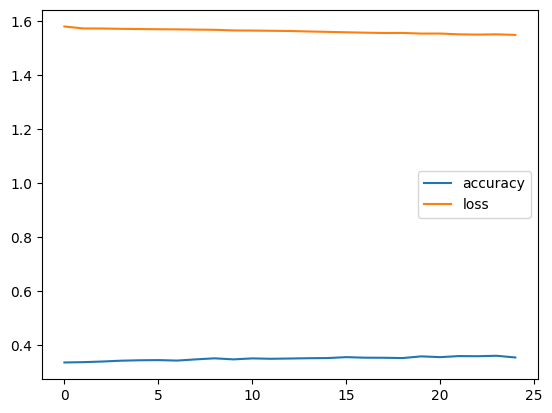

In [37]:
pd.DataFrame(model.history.history).plot()

In [38]:
##prediction with lstm  
prediction = model.predict(x_test)
prediction

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[0.29220152, 0.14486626, 0.07345483, 0.0227495 , 0.11351175,
        0.35321614],
       [0.27616465, 0.15263005, 0.08476445, 0.02446288, 0.11711966,
        0.34485832],
       [0.3080782 , 0.1372658 , 0.07049381, 0.03151919, 0.10601223,
        0.3466307 ],
       ...,
       [0.37108698, 0.13106857, 0.04843154, 0.01805612, 0.13808541,
        0.29327136],
       [0.24902199, 0.12060168, 0.1192849 , 0.04519241, 0.09070484,
        0.3751942 ],
       [0.3541875 , 0.13750541, 0.05041686, 0.01753443, 0.12844409,
        0.31191173]], dtype=float32)

In [39]:
predicted_class_index = np.argmax(prediction,axis=1)
predicted_class_index

array([5, 5, 5, ..., 0, 5, 0], dtype=int64)

## Completed
